## Data Processing

In [1]:
# Data = CMAPSSData
# Source = https://ti.arc.nasa.gov/tech/dash/groups/pcoe/prognostic-data-repository/
# Dataset = Turbofan Engine Degradation Simulation Data Set

In [2]:
# Data to be used - Train and Test data for 1

In [3]:
import pandas as pd
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt

### Notebook options

In [4]:
pd.set_option('display.max_colwidth', -1) # Column width
plt.rcParams['figure.figsize'] = [15, 10] # Size of the plots

### Data Directories

In [5]:
INPUT_DIR = '../data/raw/CMAPSSData/'
OUTPUT_DIR = '../data/interim/'

### Read the input data

In [6]:
input_file = INPUT_DIR + 'train_FD003.txt'
col_headers = ['unit', 'time_cycles', 'setting1', 'setting2', 'setting3', 
              'meas01', 'meas02', 'meas03', 'meas04', 'meas05', 'meas06', 'meas07', 'meas08', 'meas09', 'meas10', 
              'meas11', 'meas12', 'meas13', 'meas14', 'meas15', 'meas16', 'meas17', 'meas18', 'meas19', 'meas20', 
              'meas21', 'meas22', 'meas23', 'meas24', 'meas25', 'meas26']

df_raw = pd.read_csv(input_file, header=None, sep=' ', names=col_headers)

In [7]:
df_raw.head()

,unit,time_cycles,setting1,setting2,setting3,meas01,meas02,meas03,meas04,meas05,...,meas17,meas18,meas19,meas20,meas21,meas22,meas23,meas24,meas25,meas26
0,1,1,-0.0005,0.0004,100.0,518.67,642.36,1583.23,1396.84,14.62,...,391,2388,100.0,39.11,23.3537,NaN,NaN,NaN,NaN,NaN
1,1,2,0.0008,-0.0003,100.0,518.67,642.50,1584.69,1396.89,14.62,...,392,2388,100.0,38.99,23.4491,NaN,NaN,NaN,NaN,NaN
2,1,3,-0.0014,-0.0002,100.0,518.67,642.18,1582.35,1405.61,14.62,...,391,2388,100.0,38.85,23.3669,NaN,NaN,NaN,NaN,NaN
3,1,4,-0.0020,0.0001,100.0,518.67,642.92,1585.61,1392.27,14.62,...,392,2388,100.0,38.96,23.2951,NaN,NaN,NaN,NaN,NaN
4,1,5,0.0016,0.0000,100.0,518.67,641.68,1588.63,1397.65,14.62,...,392,2388,100.0,39.14,23.4583,NaN,NaN,NaN,NaN,NaN


In [8]:
cols = ['unit', 'time_cycles', 'setting1', 'setting2', 'setting3']
df_raw[cols].describe()

,unit,time_cycles,setting1,setting2,setting3
count,24720.000000,24720.000000,24720.000000,24720.000000,24720.0
mean,48.631877,139.077063,-0.000024,0.000005,100.0
std,29.348985,98.846675,0.002194,0.000294,0.0
min,1.000000,1.000000,-0.008600,-0.000600,100.0
25%,23.000000,62.000000,-0.001500,-0.000200,100.0
50%,47.000000,124.000000,0.000000,-0.000000,100.0
75%,74.000000,191.000000,0.001500,0.000300,100.0
max,100.000000,525.000000,0.008600,0.000700,100.0


In [9]:
cols = ['meas01', 'meas02', 'meas03', 'meas04', 'meas05', 'meas06', 'meas07']
df_raw[cols].describe()

,meas01,meas02,meas03,meas04,meas05,meas06,meas07
count,2.472000e+04,24720.000000,24720.000000,24720.000000,2.472000e+04,24720.000000,24720.000000
mean,5.186700e+02,642.457858,1588.079175,1404.471212,1.462000e+01,21.595841,555.143808
std,6.684921e-11,0.523031,6.810418,9.773178,3.602525e-12,0.018116,3.437343
min,5.186700e+02,640.840000,1564.300000,1377.060000,1.462000e+01,21.450000,549.610000
25%,5.186700e+02,642.080000,1583.280000,1397.187500,1.462000e+01,21.580000,553.110000
50%,5.186700e+02,642.400000,1587.520000,1402.910000,1.462000e+01,21.600000,554.050000
75%,5.186700e+02,642.790000,1592.412500,1410.600000,1.462000e+01,21.610000,556.040000
max,5.186700e+02,645.110000,1615.390000,1441.160000,1.462000e+01,21.610000,570.490000


In [10]:
cols = ['meas08', 'meas09', 'meas10', 'meas11', 'meas12', 'meas13', 'meas14']
df_raw[cols].describe()

,meas08,meas09,meas10,meas11,meas12,meas13,meas14
count,24720.000000,24720.000000,24720.000000,24720.000000,24720.000000,24720.000000,24720.000000
mean,2388.071555,9064.110809,1.301232,47.415707,523.050873,2388.071643,8144.202916
std,0.158285,19.980294,0.003485,0.300074,3.255314,0.158121,16.504118
min,2386.900000,9017.980000,1.290000,46.690000,517.770000,2386.930000,8099.680000
25%,2388.000000,9051.920000,1.300000,47.190000,521.150000,2388.010000,8134.510000
50%,2388.070000,9060.010000,1.300000,47.360000,521.980000,2388.070000,8141.200000
75%,2388.140000,9070.092500,1.300000,47.600000,523.840000,2388.140000,8149.230000
max,2388.600000,9234.350000,1.320000,48.440000,537.400000,2388.610000,8290.550000


In [11]:
cols = ['meas15', 'meas16', 'meas17', 'meas18', 'meas19', 'meas20', 'meas21']
df_raw[cols].describe()

,meas15,meas16,meas17,meas18,meas19,meas20,meas21
count,24720.000000,2.472000e+04,24720.000000,24720.0,24720.0,24720.000000,24720.000000
mean,8.396176,3.000000e-02,392.566545,2388.0,100.0,38.988552,23.393024
std,0.060512,1.750371e-14,1.761459,0.0,0.0,0.248865,0.149234
min,8.156300,3.000000e-02,388.000000,2388.0,100.0,38.170000,22.872600
25%,8.360600,3.000000e-02,391.000000,2388.0,100.0,38.830000,23.296200
50%,8.398300,3.000000e-02,392.000000,2388.0,100.0,38.990000,23.391600
75%,8.437000,3.000000e-02,394.000000,2388.0,100.0,39.140000,23.483300
max,8.570500,3.000000e-02,399.000000,2388.0,100.0,39.850000,23.950500


In [12]:
df_raw[['unit', 'time_cycles']].groupby('unit').count()

,time_cycles
unit,
1,259
2,253
3,222
4,272
5,213
6,278
7,424
8,267
9,406


### Data Statistics

In [13]:
features = list(set(col_headers) - set(['time_cycles','unit']))
print(features)

['meas01', 'meas08', 'meas13', 'setting2', 'meas17', 'meas05', 'meas09', 'meas22', 'setting1', 'meas11', 'setting3', 'meas20', 'meas16', 'meas02', 'meas18', 'meas26', 'meas12', 'meas23', 'meas19', 'meas25', 'meas07', 'meas15', 'meas14', 'meas03', 'meas04', 'meas24', 'meas10', 'meas21', 'meas06']


In [14]:
df_stats = pd.DataFrame(columns=['feature', 
                                 'total_count', 
                                 'missing_val_count', 
                                 'max_val', 
                                 'min_val', 
                                 'variance', 
                                 'std', 
                                 'mean_val', 
                                 'median_val', 
                                 'kurt', 
                                 'skew'])

idx = 0
for feature in features:
    
    df = df_raw[['unit', feature]]
    
    new_row = {
        'feature':feature, 
        'total_count': len(df), 
        'missing_val_count': len(df)-df[feature].count(), 
        'max_val': df[feature].max(), 
        'min_val': df[feature].min(), 
        'variance': df[feature].var(), 
        'std': df[feature].std(), 
        'mean_val': df[feature].mean(), 
        'median_val': df[feature].median(), 
        'kurt': df[feature].kurt(), 
        'skew': df[feature].skew()
    }
    
    df_stats.loc[idx] = new_row
    idx += 1
        
# Get the percentage missing values
df_stats['perc_missing'] = df_stats['missing_val_count']/df_stats['total_count'] * 100

In [15]:
df_stats

,feature,total_count,missing_val_count,max_val,min_val,variance,std,mean_val,median_val,kurt,skew,perc_missing
0,meas01,24720,0,518.6700,518.6700,4.468817e-21,6.684921e-11,518.670000,518.6700,0,0,0
1,meas08,24720,0,2388.6000,2386.9000,2.505412e-02,1.582849e-01,2388.071555,2388.0700,8.43131,-1.35863,0
2,meas13,24720,0,2388.6100,2386.9300,2.500215e-02,1.581207e-01,2388.071643,2388.0700,8.38138,-1.35241,0
3,setting2,24720,0,0.0007,-0.0006,8.646122e-08,2.940429e-04,0.000005,-0.0000,-1.1377,0.0096697,0
4,meas17,24720,0,399.0000,388.0000,3.102736e+00,1.761459e+00,392.566545,392.0000,-0.0740692,0.398496,0
5,meas05,24720,0,14.6200,14.6200,1.297818e-23,3.602525e-12,14.620000,14.6200,0,0,0
6,meas09,24720,0,9234.3500,9017.9800,3.992122e+02,1.998029e+01,9064.110809,9060.0100,6.29067,1.90494,0
7,meas22,24720,24720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100
8,setting1,24720,0,0.0086,-0.0086,4.811638e-06,2.193545e-03,-0.000024,-0.0000,-0.00603088,-0.012891,0
9,meas11,24720,0,48.4400,46.6900,9.004450e-02,3.000742e-01,47.415707,47.3600,-0.134813,0.633488,0


### Plotting Variances

In [16]:
def stats_plot(df_stats, use_tags=[], stat_col='variance', feature_col = 'feature'):
            
    df_variances = df_stats[[feature_col, stat_col]]
    df_variances = df_variances.loc[df_variances[stat_col] > 0.05]
    df_variances = df_variances.sort_values([stat_col], ascending=False)
    x = df_variances[feature_col]
    y = df_variances[stat_col]
    x_pos = np.arange(len(x))

    plt.bar(x_pos, y, align='center', alpha=0.5)
    plt.xticks(x_pos, x, rotation=45)
    plt.xlabel('Features')
    plt.ylabel(stat_col)
    plt.title(str(stat_col) + ' among different parameters')

    plt.show()

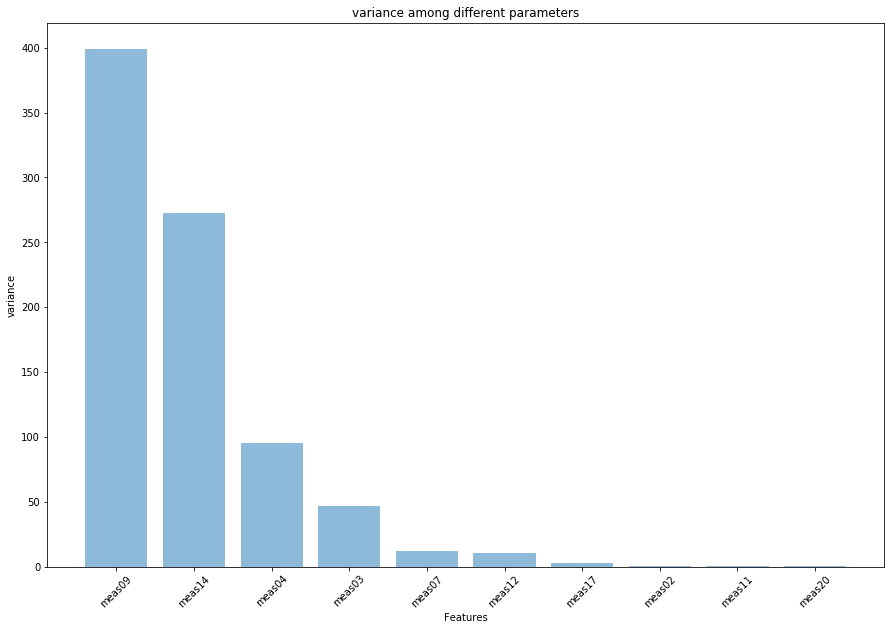

In [17]:
stats_plot(df_stats, [], 'variance', 'feature')

### Remove un-ncessary rows and columns from the data

In [18]:
df_raw.drop(columns=['meas22','meas23','meas24','meas25','meas26'], inplace=True)
df_raw.dropna(inplace=True)

### Writing to file

In [19]:
output_file = OUTPUT_DIR + 'train_case3.csv'
df_raw.to_csv(output_file, sep=',', index=False)

### Reading from a file to check vals

In [20]:
df_test = pd.read_csv(output_file)

In [21]:
df_test.head()

,unit,time_cycles,setting1,setting2,setting3,meas01,meas02,meas03,meas04,meas05,...,meas12,meas13,meas14,meas15,meas16,meas17,meas18,meas19,meas20,meas21
0,1,1,-0.0005,0.0004,100.0,518.67,642.36,1583.23,1396.84,14.62,...,522.31,2388.01,8145.32,8.4246,0.03,391,2388,100.0,39.11,23.3537
1,1,2,0.0008,-0.0003,100.0,518.67,642.50,1584.69,1396.89,14.62,...,522.42,2388.03,8152.85,8.4403,0.03,392,2388,100.0,38.99,23.4491
2,1,3,-0.0014,-0.0002,100.0,518.67,642.18,1582.35,1405.61,14.62,...,522.03,2388.00,8150.17,8.3901,0.03,391,2388,100.0,38.85,23.3669
3,1,4,-0.0020,0.0001,100.0,518.67,642.92,1585.61,1392.27,14.62,...,522.49,2388.08,8146.56,8.3878,0.03,392,2388,100.0,38.96,23.2951
4,1,5,0.0016,0.0000,100.0,518.67,641.68,1588.63,1397.65,14.62,...,522.58,2388.03,8147.80,8.3869,0.03,392,2388,100.0,39.14,23.4583
